In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = sns.load_dataset('iris') # Load the iris dataset
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape #dimansions of the dataset

(150, 5)

In [ ]:
df.columns #columns in the dataset

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T # statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.isnull().sum() #checking for null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicate values

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True) #removing duplicate values

<Figure size 1200x800 with 0 Axes>

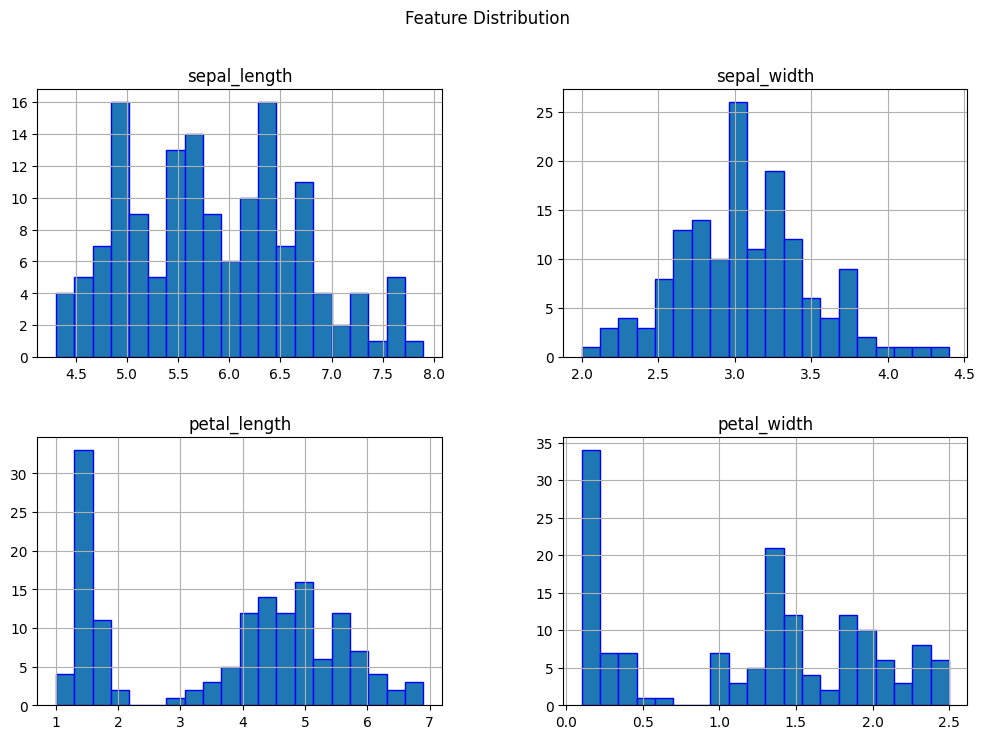

In [ ]:
plt.figure(figsize=(12,8)) 
df.hist(figsize=(12,8),bins=20,edgecolor='b') 
plt.suptitle('Feature Distribution') 
plt.show() 

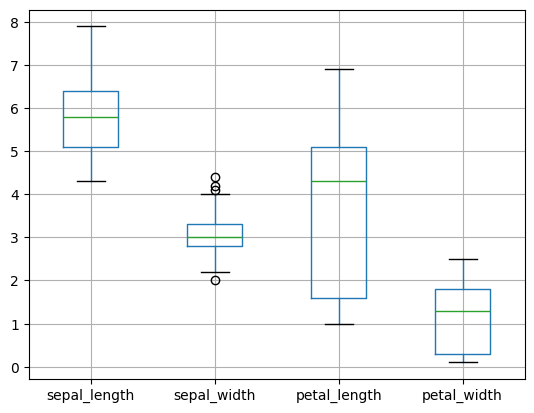

In [ ]:
df.boxplot() 
plt.show()

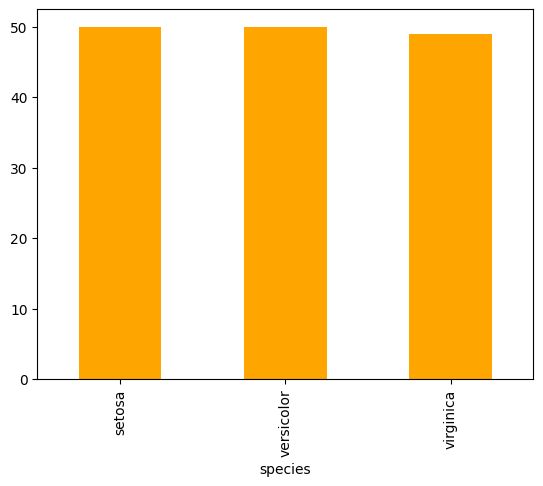

In [ ]:
df['species'].value_counts().plot(kind='bar',color='orange') 
plt.show()

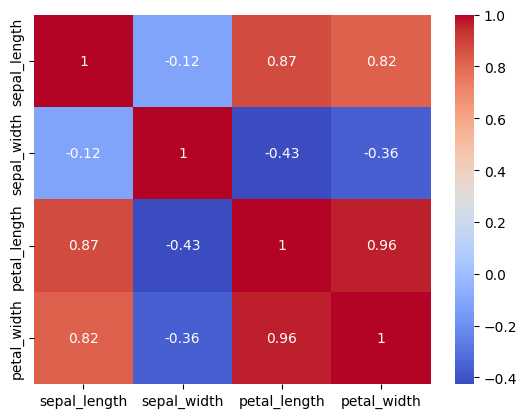

In [ ]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',] 
corr = df[col].corr(method='pearson') 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

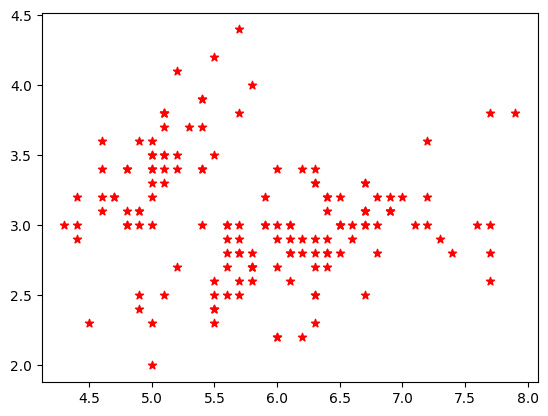

In [ ]:
plt.scatter(df['sepal_length'], df['sepal_width'],marker='*', color='red') 
plt.show()

In [ ]:
df.head(10) # Displaying the first 10 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
x = df[['sepal_length', 'sepal_width']] # Features for clustering

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

In [18]:
wsse = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    wsse.append(km.inertia_)

In [19]:
from kneed import KneeLocator

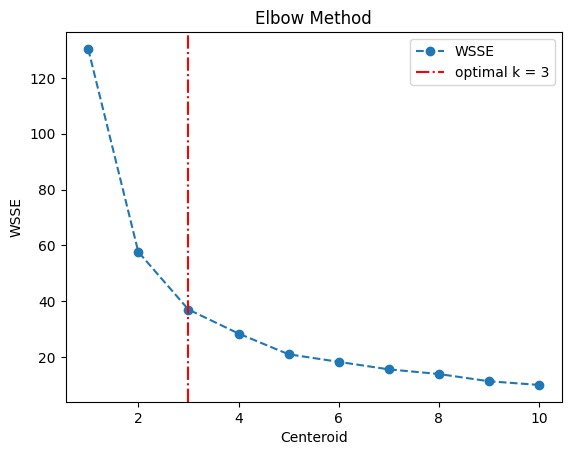

In [ ]:
plt.plot(range(1,11), wsse, marker='o', linestyle='--', label='WSSE')
plt.axvline(x=optimal_k, color='r', linestyle='-.', label=f"optimal k = {optimal_k}")
plt.xlabel('Centeroid')
plt.ylabel('WSSE')
plt.title('Elbow Method')
plt.legend()  
plt.show()

In [22]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.cluster_centers_ # Coordinates of the cluster centers

array([[5.77307692, 2.69230769],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [ ]:
pred = model.predict(x) 
pred # Assigning cluster labels to the original dataframe

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
model.inertia_ # Within-cluster sum of squares

37.04993289689035

In [ ]:
silhouette_score = silhouette_score(x, pred) # Calculating the silhouette score
print(silhouette_score) 

0.44291140114777555


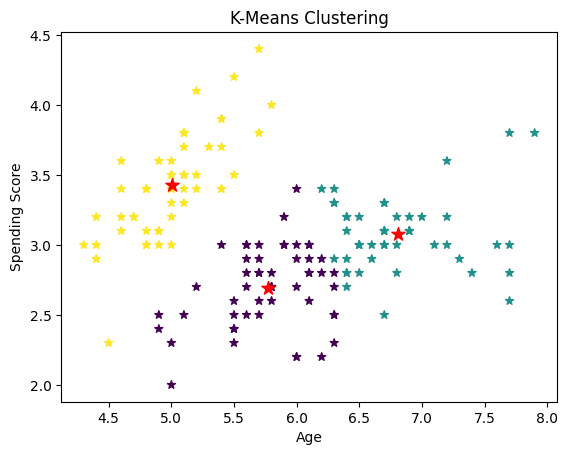

In [27]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred , cmap='viridis', marker='*')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red', marker='*')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
new_data = [['5', '3.5']] # New data point for prediction
predict = model.predict(new_data) # Predicting the cluster for the new data point
predict[0] # Assigning the predicted cluster to the new data point

np.int32(2)